In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
from src.perturbation_equations import solve_mukhanov_sasaki


In [5]:
# Intervalo do tempo conforme (em eta < 0)
eta_vals = np.linspace(-100, -0.1, 1000)

# Modos de Fourier (em escalas cosmológicas)
ks = np.logspace(-4, -1, 60)

# Lista para o espectro de potência
P_R = []

# z(η) em slow-roll (z''/z = 2/η² ⇒ z = const / η)
def z_of_eta(eta, H=1.0, epsilon=0.01):
    return -1 / (H * eta * np.sqrt(2 * epsilon))


In [6]:
for k in ks:
    eta, u_k = solve_mukhanov_sasaki(k, eta_vals)
    z = z_of_eta(eta[-1])  # valor final de z
    P_k = (k**3 / (2 * np.pi**2)) * np.abs(u_k[-1] / z)**2
    P_R.append(P_k)

P_R = np.array(P_R)  # transforma em array para facilitar


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\belem\AppData\Local\Temp\ipykernel_57784\4162815551.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Espectro de Potência Primordial $P_{\mathcal{R}}(k)$')


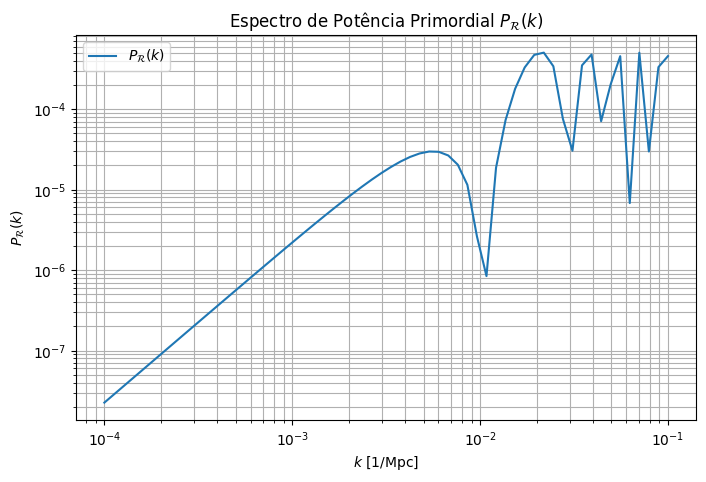

In [7]:
plt.figure(figsize=(8, 5))
plt.loglog(ks, P_R, label=r'$P_{\mathcal{R}}(k)$')
plt.xlabel(r'$k$ [1/Mpc]')
plt.ylabel(r'$P_{\mathcal{R}}(k)$')
plt.title('Espectro de Potência Primordial $P_{\mathcal{R}}(k)$')
plt.grid(True, which='both')
plt.legend()

# Salvar de forma robusta
os.makedirs("../figures", exist_ok=True)
fig_path = os.path.join("..", "figures", "power_spectrum_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()


In [8]:
log_k = np.log(ks)
log_P = np.log(P_R)

slope, intercept, r_value, p_value, std_err = linregress(log_k, log_P)
n_s = slope + 1

print(f"Índice espectral estimado: n_s = {n_s:.5f}")
print(f"Inclinação (slope) = {slope:.5f}")
print(f"Erro padrão = {std_err:.5e}")


Índice espectral estimado: n_s = 2.33213
Inclinação (slope) = 1.33213
Erro padrão = 7.43749e-02


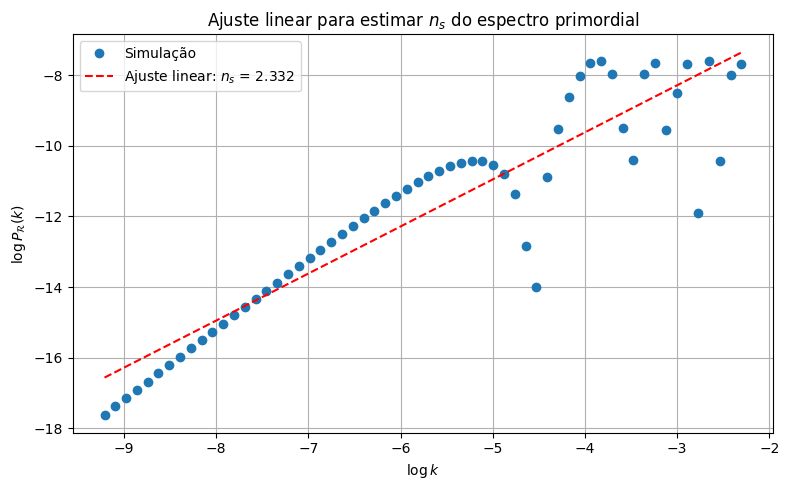

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(log_k, log_P, 'o', label='Simulação')
plt.plot(log_k, slope * log_k + intercept, 'r--', label=fr'Ajuste linear: $n_s$ = {n_s:.3f}')
plt.xlabel(r'$\log k$')
plt.ylabel(r'$\log P_{\mathcal{R}}(k)$')
plt.title('Ajuste linear para estimar $n_s$ do espectro primordial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
